In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import load_model
from keras.layers import Dropout,Conv1D, MaxPooling1D, Flatten,TimeDistributed,Bidirectional
import math
import datetime as dt
from datetime import datetime    
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler

def import_data_from_csv(path: str):
    """
    Imports data from a csv file and returns a pandas dataframe.
    """
    return pd.read_csv(path)


In [38]:
data = import_data_from_csv("..\..\data\processed\AAPL.csv")

In [39]:
df = data

In [40]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
train_X_values = []
test_X_values = []
train_Y_values = []
test_Y_values = []

num_splits = 5
split_size = len(X) / num_splits

X_splits = [X[int(i * split_size):int((i + 1) * split_size)] for i in range(num_splits)]
Y_splits = [Y[int(i * split_size):int((i + 1) * split_size)] for i in range(num_splits)]

    
for i in range(num_splits):
    x_train, x_test, y_train, y_test = train_test_split(X_splits[i], Y_splits[i], test_size=0.2, shuffle=True)
    train_X = np.array(x_train)
    test_X = np.array(x_test)
    train_Y = np.array(y_train)
    test_Y = np.array(y_test)
    
    train_X = train_X.reshape(train_X.shape[0],1,100,1)
    test_X = test_X.reshape(test_X.shape[0],1,100,1)
    
    train_X_values.append(train_X)
    test_X_values.append(test_X)
    train_Y_values.append(train_Y)
    test_Y_values.append(test_Y)

print("Done! Test and train data are ready")


Done! Test and train data are ready


Epoch 1/20
13/13 [==============================] - 20s 305ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1517 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0806
Epoch 2/20
13/13 [==============================] - 0s 34ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0871 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0565
Epoch 3/20
13/13 [==============================] - 0s 34ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0668 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0575
Epoch 4/20
13/13 [==============================] - 0s 36ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0678 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0537
Epoch 5/20
13/13 [==============================] - 0s 33ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0650 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0477
Epoch 6/20
13/13 [==============================] - 0s 33ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0583 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0440
Epoch 7/20
13/13 [==

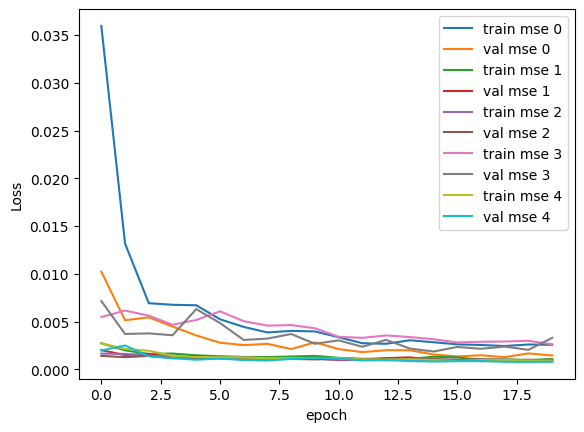

In [55]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

for i in range(len(train_X_values)):
    history = model.fit(train_X_values[i], train_Y_values[i], validation_data=(test_X_values[i],test_Y_values[i]), epochs=20,batch_size=40, verbose=1, shuffle =True)
    plt.plot(history.history['mse'], label='train mse '+str(i))
    plt.plot(history.history['val_mse'], label='val mse '+str(i))
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.legend()
    model.save("checkpoints/APPL/cnn-lstm-"+str(i+1)+".keras")

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [19]:
model.evaluate(test_X, test_Y)

6/6 [==============================] - 0s 9ms/step - loss: 4.9763e-04 - mse: 4.9763e-04 - mae: 0.0172


[0.0004976342897862196, 0.0004976342897862196, 0.017226267606019974]

In [20]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.965071
R2 Score: 0.965071
Max Error: 0.087016


In [42]:
# predicted  = model.predict(test_X)
# test_label = test_Y.reshape(-1,1)
# predicted = np.array(predicted[:,0]).reshape(-1,1)
# len_t = len(train_X)
# for j in range(len_t , len_t + len(test_X)):
#     temp = data.iloc[j,3]
#     test_label[j - len_t] = test_label[j - len_t] * temp + temp
#     predicted[j - len_t] = predicted[j - len_t] * temp + temp
# plt.plot(test_label, color = 'red', label = 'Real Stock Price')
# plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
# plt.title(' Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel(' Stock Price')
# plt.legend()
# plt.show()

In [74]:
# Load model
new_model = tf.keras.models.load_model("checkpoints/GOOG/cnn-lstm-1.keras")
new_model2 = tf.keras.models.load_model("checkpoints/GOOG/cnn-lstm-2.keras")
new_model3 = tf.keras.models.load_model("checkpoints/GOOG/cnn-lstm-3.keras")
new_model4 = tf.keras.models.load_model("checkpoints/GOOG/cnn-lstm-4.keras")
new_model5 = tf.keras.models.load_model("checkpoints/GOOG/cnn-lstm-5.keras")

Loading data ...
Analyse data ...
Predicting ...
99/99 [==============================] - 3s 7ms/step
3160


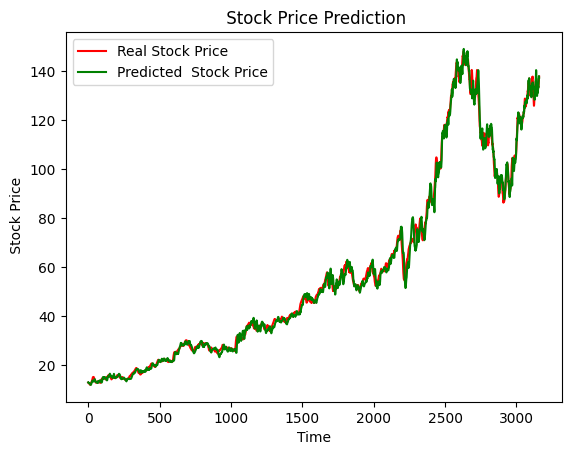

In [75]:
print("Loading data ...")
data2 = import_data_from_csv("..\..\data\processed\GOOG.csv")
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.reset_index(drop=True, inplace=True)
df2 = data2.drop('Date', axis=1)

X = []
Y = []
print("Analyse data ...")
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

test_X = np.array(X)
test_Y = np.array(Y)

test_X = test_X.reshape(test_X.shape[0],1,100,1)

print("Predicting ...")
new_model.evaluate(test_X, test_Y)
new_model2.evaluate(test_X, test_Y)
new_model3.evaluate(test_X, test_Y)
new_model4.evaluate(test_X, test_Y)
new_model5.evaluate(test_X, test_Y)

predicted  = new_model5.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(test_X)
print(len_t)
for j in range(len_t):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()
